## K-Means Clustering Algorithm for Customer Segmentation
Customer segmentation helps supermarkets understand their customers better and create more effective marketing strategies. In this project, we use K-means clustering, a machine learning method, to group customers based on their annual income and spending at 
supermarkets.
Our model utilizes K-means clustering, a popular unsupervised machine learning algorithm, to divide customers into clusters with similar characteristics.
By dividing customers into different groups, supermarkets can tailor their products and promotions to meet the needs of each segment. This approach helps businesses offer the right products to the right customers, improving satisfaction and sales.


## Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
%matplotlib inline

## Data Collection and Analysis

In [3]:
data = pd.read_csv("data/customers_data.csv")

In [4]:
data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Choosing Annual Income and Spending Score as a relevant features for the customer segmentation

In [7]:
X = data.iloc[:,[3, 4]]
X


Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]

In [8]:
X = X.to_numpy()

In [9]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Choosing Number of Clusters

We will use WCSS (Within Cluster Sum of squares) and Elbow Point Graph method to find the appropriate number of clusters required for the customer segmentation.

In [11]:
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters= i, random_state= 22, init = "k-means++", n_init = 10)
    model.fit(X)
    wcss.append(model.inertia_)


Text(0, 0.5, 'WCSS')

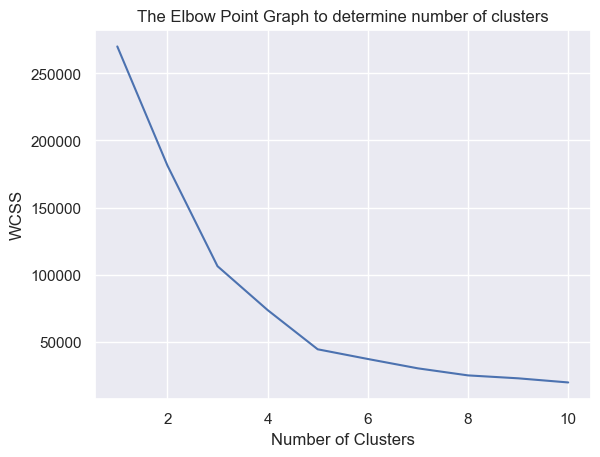

In [14]:
sns.set()
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Point Graph to determine number of clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")


## Number of Clusters = 5 

In [17]:
## Training the K-Means Clustering Model

model = KMeans(n_clusters = 5, n_init = 10, random_state = 22, init = "k-means++")

In [18]:
Y = model.fit_predict(X)

In [19]:
Y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

## Graph Plotting

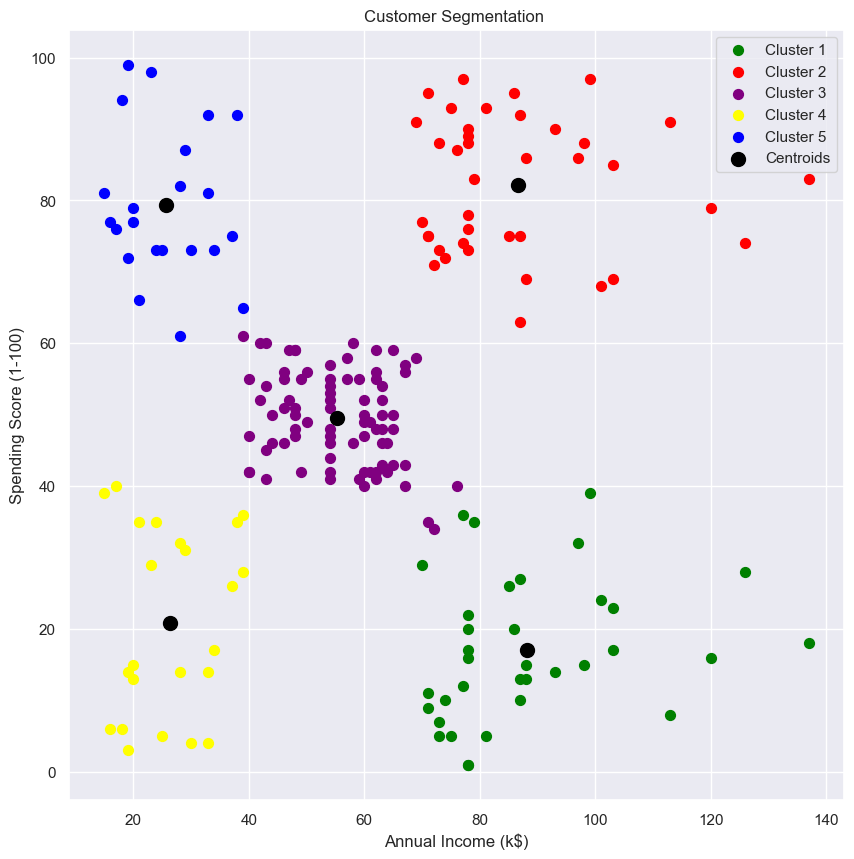

In [25]:
plt.figure(figsize = (10,10))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s = 50, c = 'green', label = 'Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s = 50, c = 'red', label = 'Cluster 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s = 50, c = 'purple', label = 'Cluster 3')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s = 50, c = 'yellow', label = 'Cluster 4')
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s = 50, c = 'blue', label = 'Cluster 5')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:, 1], s = 100, label = "Centroids", c = "black")
plt.legend()
plt.title("Customer Segmentation ")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()